<a href="https://colab.research.google.com/github/akshay190/Akkijain/blob/master/Final_VGG_SVM_Model_For_Proect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                  Cross Domain Face Verification

---



                                                       Import Requried Libraries

In [1]:
import numpy as np
import os
from os.path import join
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


                                                MODEL CREATION USING VGG16

In [2]:
model = VGG16(weights='imagenet')
model.layers.pop()
for l in model.layers:
    l.trainable=False
model1 = Model(inputs=model.inputs, outputs=model.layers[-1].output)
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())





553467904/553467096 [==============================] - 14s 0us/step








Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________

                                                                Plot Your Model

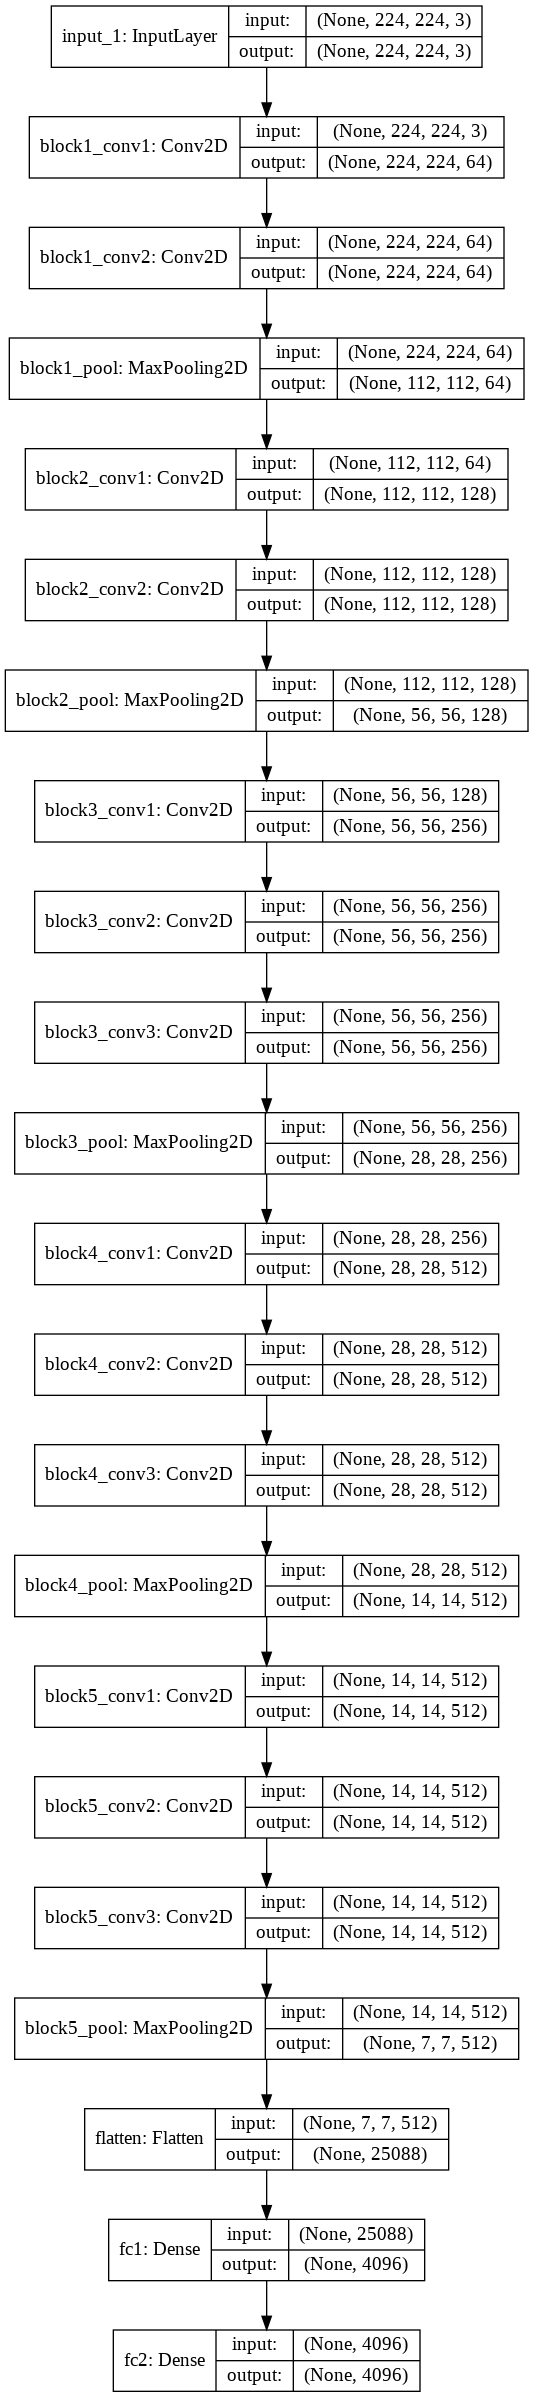

In [3]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

                      Google Drive Mount Where Train and Test Data are available







In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


                                                            Now Train Your Model

In [5]:
os.chdir("/gdrive/My Drive/Train/True")
print("In True Class")
!ls
os.chdir("/gdrive/My Drive/Train/True")
print("In False Class")
!ls
os.chdir("/gdrive/My Drive/Train/abhi")
print("In False Class")
!ls

In True Class
001  008  015  022  029  036  043  050	057  064  071  078  085  092  099
002  009  016  023  030  037  044  051	058  065  072  079  086  093  100
003  010  017  024  031  038  045  052	059  066  073  080  087  094  101
004  011  018  025  032  039  046  053	060  067  074  081  088  095  102
005  012  019  026  033  040  047  054	061  068  075  082  089  096  103
006  013  020  027  034  041  048  055	062  069  076  083  090  097  104
007  014  021  028  035  042  049  056	063  070  077  084  091  098  105
In False Class
001  008  015  022  029  036  043  050	057  064  071  078  085  092  099
002  009  016  023  030  037  044  051	058  065  072  079  086  093  100
003  010  017  024  031  038  045  052	059  066  073  080  087  094  101
004  011  018  025  032  039  046  053	060  067  074  081  088  095  102
005  012  019  026  033  040  047  054	061  068  075  082  089  096  103
006  013  020  027  034  041  048  055	062  069  076  083  090  097  104
007  014  021  028  03

In [6]:
data=[]
label=[]
for i in range(1,106):
  if(len(str(i))==1):
    r="00"+str(i)
  elif(len(str(i))==2):
    r="0"+str(i)
  else:
    r=str(i)
  r=os.path.join("/gdrive/My Drive/Train/True",r)
  os.chdir(r)
  print("At Folder",i)
  image1 = cv2.imread('Automated retinex.jpg', cv2.IMREAD_UNCHANGED)
  #cv2_imshow(image1)
  image2 = cv2.imread('cropSelfi.jpg', cv2.IMREAD_UNCHANGED)
  #cv2_imshow(image2)
  array1=img_to_array(image1)
  x1 = np.expand_dims(array1, axis=0)
  print(x1.shape)
  y1=model1.predict(x1)
  print(y1.shape)
  array2=img_to_array(image2)
  x2= np.expand_dims(array2, axis=0)
  print(x2.shape)
  y2=model1.predict(x2)
  print(y2.shape)
  print(y1)
  print(y2)
  y1=preprocessing.normalize(y1)
  print(y1)
  y2=preprocessing.normalize(y2)
  print(y2)
  com=np.multiply(y1,y2)
  print(com)
  f1=np.reshape(com, (4096))
  print(f1)
  data.append(f1)
  label.append(1)

At Folder 1
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 0.        1.0565457 0.       ]]
[[0.        0.        0.        ... 0.        0.        1.0537994]]
[[0.         0.         0.         ... 0.         0.01157335 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.01592901]]
[[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
At Folder 2
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.6609911 0.        0.        ... 0.        0.        1.592303 ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.00783551 0.         0.         ... 0.         0.         0.01887546]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
At Folder 3
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.         0.         0.         ... 0.         0.56855565 0.27777368]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.00776532 0.00379383]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]

In [7]:
for i in range(1,106):
  if(len(str(i))==1):
    r="00"+str(i)
  elif(len(str(i))==2):
    r="0"+str(i)
  else:
    r=str(i)
  r=os.path.join("/gdrive/My Drive/Train/False",r)
  os.chdir(r)
  print("At Folder",i)
  image1 = cv2.imread('Automated retinex.jpg', cv2.IMREAD_UNCHANGED)
  #cv2_imshow(image1)
  image2 = cv2.imread('cropSelfi.jpg', cv2.IMREAD_UNCHANGED)
  #cv2_imshow(image2)
  array1=img_to_array(image1)
  x1 = np.expand_dims(array1, axis=0)
  print(x1.shape)
  y1=model1.predict(x1)
  print(y1.shape)
  array2=img_to_array(image2)
  x2= np.expand_dims(array2, axis=0)
  print(x2.shape)
  y2=model1.predict(x2)
  print(y2.shape)
  print(y1)
  print(y2)
  y1=preprocessing.normalize(y1)
  print(y1)
  y2=preprocessing.normalize(y2)
  print(y2)
  com=np.multiply(y1,y2)
  print(com)
  f1=np.reshape(com, (4096))
  print(f1)
  data.append(f1)
  label.append(0)

At Folder 1
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 0.        1.0565457 0.       ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.01157335 0.        ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
At Folder 2
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.6609911 0.        0.        ... 0.        0.        1.592303 ]]
[[0.        0.        0.        ... 0.        0.        1.0537994]]
[[0.00783551 0.         0.         ... 0.         0.         0.01887546]]
[[0.         0.         0.         ... 0.         0.         0.01592901]]
[[0.         0.         0.         ... 0.         0.         0.00030067]]
[0.         0.         0.         ... 0.         0.         0.00030067]
At Folder 3
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.         0.         0.         ... 0.         0.56855565 0.27777368]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.  

In [9]:
for i in range(1,201):
  if(len(str(i))==1):
    r="00"+str(i)
  elif(len(str(i))==2):
    r="0"+str(i)
  else:
    r=str(i)
  r=os.path.join("/gdrive/My Drive/Train/abhi",r)
  os.chdir(r)
  print("At Folder",i)
  image1 = cv2.imread('Automated retinex.jpg', cv2.IMREAD_UNCHANGED)
  #cv2_imshow(image1)
  image2 = cv2.imread('cropSelfi.jpg', cv2.IMREAD_UNCHANGED)
  #cv2_imshow(image2)
  array1=img_to_array(image1)
  x1 = np.expand_dims(array1, axis=0)
  print(x1.shape)
  y1=model1.predict(x1)
  print(y1.shape)
  array2=img_to_array(image2)
  x2= np.expand_dims(array2, axis=0)
  print(x2.shape)
  y2=model1.predict(x2)
  print(y2.shape)
  print(y1)
  print(y2)
  y1=preprocessing.normalize(y1)
  print(y1)
  y2=preprocessing.normalize(y2)
  print(y2)
  com=np.multiply(y1,y2)
  print(com)
  f1=np.reshape(com, (4096))
  print(f1)
  data.append(f1)
  label.append(0)

At Folder 1
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 0.        0.        1.1826341]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.01839392]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
At Folder 2
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.         0.         0.         ... 0.         0.25501466 1.055552  ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.00360512 0.01492227]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
At Folder 3
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.         0.         0.4582543  ... 1.3125622  0.68054825 2.4383922 ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.00452676 ... 0.01296586 0.00672265 0.02408712]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
At Folder 4
(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1

In [10]:
print(data)
print(label)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.00012681], dtype=float32), array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
       0.000000e+00, 9.755063e-06], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0

                                                     Now Fit Your SVM Algoritham

In [0]:
x=np.array(data)
y=np.array(label)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [54]:
clf = SVC(kernel='rbf', C=10000,gamma=10000) 
clf.fit(x_train,y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10000, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[53  6]
 [18  5]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        59
           1       0.45      0.22      0.29        23

    accuracy                           0.71        82
   macro avg       0.60      0.56      0.55        82
weighted avg       0.66      0.71      0.67        82



                                                   Test Your Data For True class

At Folder 35


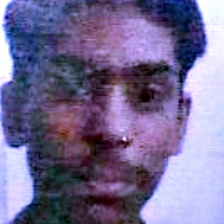

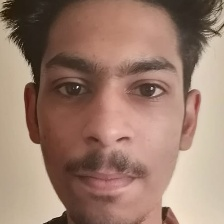

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 2.1331809 1.9305408 0.       ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.02098971 0.01899581 0.        ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
At Folder 36


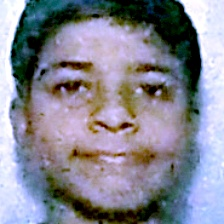

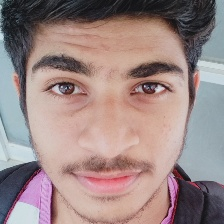

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.         0.         0.         ... 0.70989347 1.1883543  1.385684  ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.00792455 0.01326561 0.01546841]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]
At Folder 37


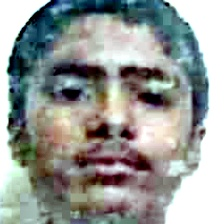

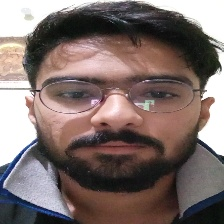

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.       0.       0.       ... 4.980689 5.01249  0.      ]]
[[0.        0.        0.        ... 0.        0.        1.2097964]]
[[0.         0.         0.         ... 0.03440237 0.03462202 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.01037694]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
At Folder 38


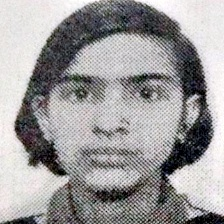

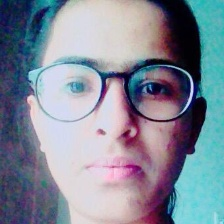

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 2.8580518 0.        2.0535045]]
[[0.         0.         0.         ... 0.         0.         0.74535936]]
[[0.         0.         0.         ... 0.03761921 0.         0.02702933]]
[[0.         0.         0.         ... 0.         0.         0.01088643]]
[[0.         0.         0.         ... 0.         0.         0.00029425]]
[0]
At Folder 39


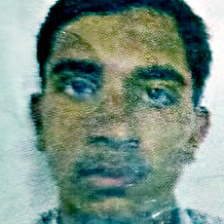

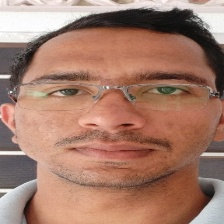

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 0.        0.        1.2825729]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.01539938]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[1]


In [35]:
c=0
m=0
tdata=[]
tlabel=[]
for i in range(35,40):
  if(len(str(i))==1):
    r="00"+str(i)
  elif(len(str(i))==2):
    r="0"+str(i)
  else:
    r=str(i)
  r=os.path.join("/gdrive/My Drive/Train/True",r)
  os.chdir(r)
  print("At Folder",i)
  image1 = cv2.imread('Automated retinex.jpg', cv2.IMREAD_UNCHANGED)
  cv2_imshow(image1)
  image2 = cv2.imread('cropSelfi.jpg', cv2.IMREAD_UNCHANGED)
  cv2_imshow(image2)
  array1=img_to_array(image1)
  x1 = np.expand_dims(array1, axis=0)
  print(x1.shape)
  y1=model1.predict(x1)
  print(y1.shape)
  array2=img_to_array(image2)
  x2= np.expand_dims(array2, axis=0)
  print(x2.shape)
  y2=model1.predict(x2)
  print(y2.shape)
  print(y1)
  print(y2)
  y1=preprocessing.normalize(y1)
  print(y1)
  y2=preprocessing.normalize(y2)
  print(y2)
  com=np.multiply(y1,y2)
  print(com)
  f1=np.reshape(com, (4096))
  tdata.append(f1)
  tlabel.append(1)
  t1=clf.predict(com)
  print(t1)
  if(t1==1):
    c+=1
  m+=1

In [36]:
print(c,"test are Rightly Classify Among",m)

3 test are Rightly Classify Among 5


                                                  Test Your Data For False class

At Folder 25


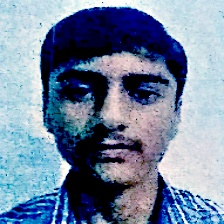

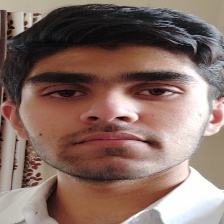

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 0.        2.0407088 0.9558036]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.02265454 0.01061067]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
At Folder 26


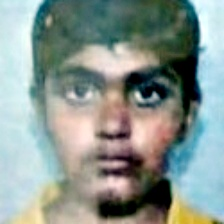

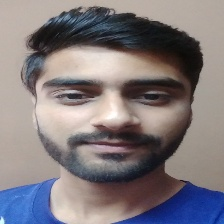

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 0.        1.2159965 3.1455293]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.01515721 0.03920854]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
At Folder 27


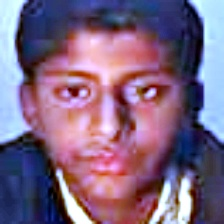

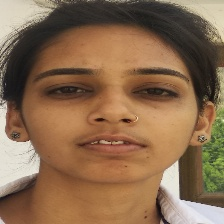

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.         0.25457975 0.         ... 0.07358775 5.0715995  2.4707098 ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.00284064 0.         ... 0.0008211  0.05658961 0.02756852]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
At Folder 28


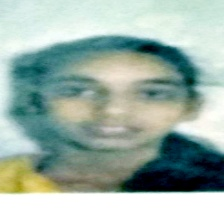

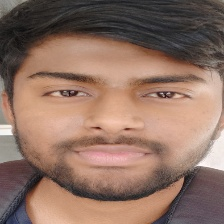

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.         0.         1.0558362  ... 0.         0.12516853 0.5956565 ]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.01675448 ... 0.         0.00198623 0.00945214]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]
At Folder 29


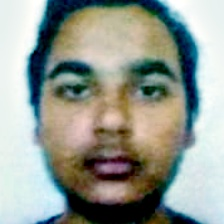

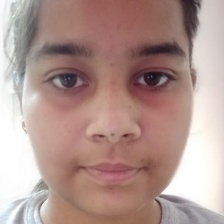

(1, 224, 224, 3)
(1, 4096)
(1, 224, 224, 3)
(1, 4096)
[[0.        0.        0.        ... 0.        0.        1.4801385]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.01915788]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[0]


In [37]:
d=0
n=0
for i in range(25,30):
  if(len(str(i))==1):
    r="00"+str(i)
  elif(len(str(i))==2):
    r="0"+str(i)
  else:
    r=str(i)
  r=os.path.join("/gdrive/My Drive/Train/False",r)
  os.chdir(r)
  print("At Folder",i)
  image1 = cv2.imread('Automated retinex.jpg', cv2.IMREAD_UNCHANGED)
  cv2_imshow(image1)
  image2 = cv2.imread('cropSelfi.jpg', cv2.IMREAD_UNCHANGED)
  cv2_imshow(image2)
  array1=img_to_array(image1)
  x1 = np.expand_dims(array1, axis=0)
  print(x1.shape)
  y1=model1.predict(x1)
  print(y1.shape)
  array2=img_to_array(image2)
  x2= np.expand_dims(array2, axis=0)
  print(x2.shape)
  y2=model1.predict(x2)
  print(y2.shape)
  print(y1)
  print(y2)
  y1=preprocessing.normalize(y1)
  print(y1)
  y2=preprocessing.normalize(y2)
  print(y2)
  com=np.multiply(y1,y2)
  print(com)
  f1=np.reshape(com, (4096))
  tdata.append(f1)
  tlabel.append(0)
  t2=clf.predict(com)
  print(t2)
  n+=1
  if(t2==0):
    d+=1

In [38]:
print(d,"test pare Rightly Classify Among",n)


5 test pare Rightly Classify Among 5


In [39]:
print("Accuracy=",((c+d)/(m+n))*100)

Accuracy= 80.0
